Project - House Prices Modelling

To import important libraries required for the project

In [69]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import csv

To load the data from Required data source here it is CSV

In [70]:
df = pd.read_csv('train.csv')

In [71]:
df_test = pd.read_csv('test.csv')

## checking the dimensions of our data


In [72]:
df.shape

(1460, 81)

To check all necessary information about our data 
remove hashtag (#df.info)and execute to check the data

In [73]:
#df.info()

to check null values present in out data 

In [74]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


Here we check the Heatmap for Null values 

<AxesSubplot:>

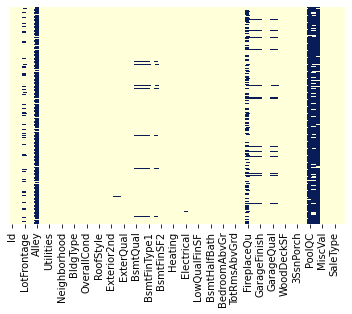

In [75]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

Taking an example of the column which has null values and counting them

In [76]:
 df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

to see all the null values in our Dataframe
Remove the hashtag and execute to visualize

In [77]:
#pd.isna(df)

To remove the missing values from various columns.

In [78]:
df['lotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [79]:
df['ExterCond']=df['ExterCond'].fillna(df['ExterCond'].mode()[0])
df['Foundation']=df['Foundation'].fillna(df['Foundation'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [80]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['HouseStyle']=df['HouseStyle'].fillna(df['HouseStyle'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['CentralAir']=df['CentralAir'].fillna(df['CentralAir'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])


In [81]:
df.shape  ## checking the shape after removing the null/missing values

(1460, 82)

Droping the unnecessary columns

In [82]:
df.drop(['Alley'],axis=1,inplace=True)

In [83]:
df.drop(['PoolQC'],axis=1,inplace=True)

In [84]:
df.drop(['Fence','MiscFeature','GarageYrBlt'],axis=1,inplace=True)

In [85]:
df.drop(['Id'],axis=1,inplace=True)

In [86]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
lotFrontage        0
Length: 76, dtype: int64

In [87]:
df['LotShape']=df['LotShape'].fillna(df['LotShape'].mode()[0])
df['LotArea']=df['LotArea'].fillna(df['LotArea'].mode()[0])
df['LotConfig']=df['LotConfig'].fillna(df['LotConfig'].mode()[0])


To visualize if we succeded in the task of removal of unecessary values

<AxesSubplot:>

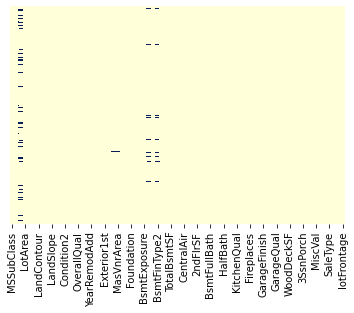

In [88]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [89]:
df.dropna(inplace= True)

In [90]:
df.shape

(1162, 76)

In [91]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,lotFrontage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,65.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,80.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,68.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,60.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,84.0


To visualize our final dataframe required selecting the columns for the same

In [92]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [93]:
df_test.shape

(1459, 80)

Performing one_hot_encoding on the dataframe.

In [94]:
def onehot_manyColumns(many_cols):
    df_result=result_df
    i=0
    for fields in many_cols:
        print(fields)
        df1=pd.get_dummies(result_df[fields],drop_first=True)
        result_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_result=df1.copy()
        else:
            df_result=pd.concat([df_result,df1],axis=1)
        i=i+1
    df_result=pd.concat([result_df,df_result],axis=1)
        
    
    return df_result

In [95]:
result_df = df.copy()

In [96]:
result_df=onehot_manyColumns(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [97]:
result_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1162, dtype: int64

In [98]:
result_df =result_df.loc[:,~result_df.columns.duplicated()]

to see our final data frame remove Hashtag and execute

In [117]:
#result_df

In [118]:
Final_DF= result_df.drop(['SalePrice'], axis = 1)

In [119]:
X_train= Final_DF
Y_train= result_df['SalePrice']

In [120]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import ElasticNet, Lasso, ElasticNetCV


In [151]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(X_test: np.ndarray, X_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(X_test, X_pred))
    return round(rmsle, precision)

In [164]:
lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)
Y_train_pred = lr_model.predict(X_train)
MSE_train = np.mean((Y_train_pred - Y_train))

print("Mean Squared Error = {:.1f}".format(MSE_train))
print("RMSE score for Linear Regression: {:.1f}".format(compute_rmsle(lr_model)))

Mean Squared Error = -0.0


TypeError: compute_rmsle() missing 1 required positional argument: 'X_pred'